In [1]:
# outliers are points different to the data 
# credit card fraud, medical
# outliers can and cannot be useful: depends on use case
# sales forcasting has spikes: should we keep outliers? Yes

# Which ML models are sensitive to outliers?
1. Naive Bayes Classifier --- Not sensitive to outliers
2. SVM --- No
3. Linear Regression --- Yes
4. Logistic Regression --- Yes
5. Decision Tree Regressor or Classifier --- No
6. Ensemble Techniques: RF, XGBoost, GB --- No
7. KNN --- No
8. Kmeans --- Yes
9. Hierarchical --- Yes
10. PCA --- Yes
11. Neural Networks --- Yes

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Age'].isnull().sum()

177

In [10]:
df.shape

(891, 12)

<AxesSubplot:xlabel='Age'>

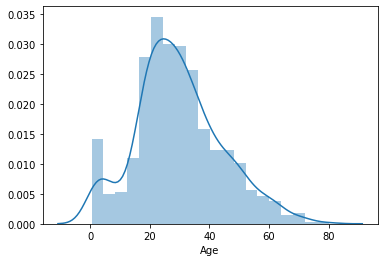

In [13]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

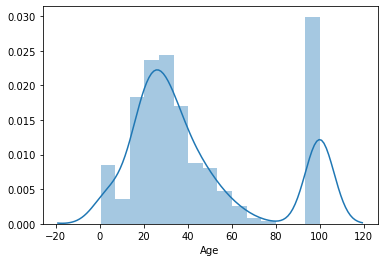

In [14]:
# introducing outliers
sns.distplot(df['Age'].fillna(100))

In [ ]:
######### Guassian distribution

Text(0, 0.5, 'Number of passengers')

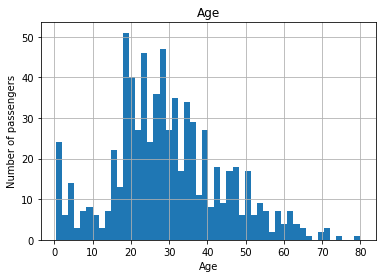

In [18]:
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('Number of passengers')

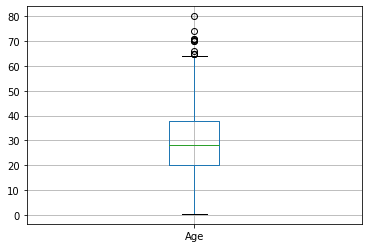

In [19]:
fig = df.boxplot(column='Age')

In [20]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
#### Assuming age follows a gausian distribution we will
# calulate the boundaries that differentiate the outliers

upper_bound = df.Age.mean() + 3*df.Age.std()
lower_bound = df.Age.mean() - 3*df.Age.std()
print(lower_bound, upper_bound)

-13.88037434994331 73.27860964406095


In [23]:
# let's compute the IQR fot boundaries : Q3-Q1
IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)
print(IQR)

17.875


In [24]:
lower_bridge = df.Age.quantile(0.25) - 1.5*IQR
upper_bridge = df.Age.quantile(0.75) + 1.5*IQR
print(lower_bridge, upper_bridge)

-6.6875 64.8125


In [25]:
# extreme outliers
lower_bridge = df.Age.quantile(0.25) - 3*IQR
upper_bridge = df.Age.quantile(0.75) + 3*IQR
print(lower_bridge, upper_bridge)

-33.5 91.625


Text(0, 0.5, 'Number of passengers')

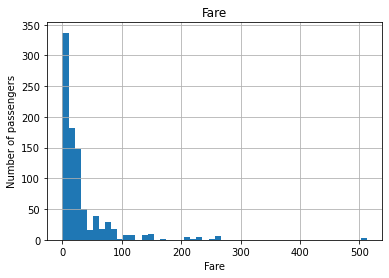

In [26]:
#### feature is skewed: not gaussian
fig = df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of passengers')

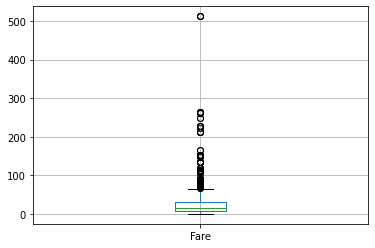

In [29]:
fig = df.boxplot(column='Fare')

In [30]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
print(IQR)

23.0896


In [32]:
lower_bridge = df.Fare.quantile(0.25) - 1.5*IQR
upper_bridge = df.Fare.quantile(0.75) + 1.5*IQR
print(lower_bridge, upper_bridge)

-26.724 65.6344


In [33]:
# show consider extreme outliers in case of skewed data 
# extreme outliers
lower_bridge = df.Fare.quantile(0.25) - 3*IQR
upper_bridge = df.Fare.quantile(0.75) + 3*IQR
print(lower_bridge, upper_bridge)

-61.358399999999996 100.2688


In [46]:
data = df.copy()

In [48]:
data.loc[data['Age']>=73,'Age']=73

In [49]:
data.loc[data['Fare']>=100,'Fare']=100

<AxesSubplot:>

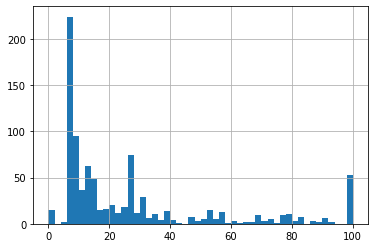

In [50]:
data.Fare.hist(bins=50)

<AxesSubplot:>

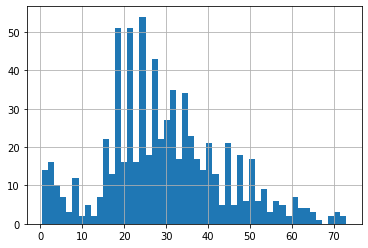

In [51]:
data.Age.hist(bins=50)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=0.3)

In [57]:
### logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       162
           1       0.71      0.28      0.41       106

    accuracy                           0.67       268
   macro avg       0.69      0.60      0.59       268
weighted avg       0.68      0.67      0.63       268



In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

classifier_tree = RandomForestClassifier()
classifier_tree.fit(X_train, y_train)
y_pred = classifier_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       162
           1       0.59      0.45      0.51       106

    accuracy                           0.66       268
   macro avg       0.64      0.62      0.62       268
weighted avg       0.65      0.66      0.65       268

